# Hierarchical Clustering
This notebook shows simple examples of hierarchical clustering and the elbow/knee analysis used to select the most adequate number of clusters.

The notebook is an adaptation of 

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

We start by importing the required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.datasets import make_blobs

# we are using the scipy implementation
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

%matplotlib inline

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

## Example Data
To show some examples of k-means we create an artificial dataset comprising three blobs.

In [10]:
random_state = 1234 ## another interesting example can be generated using the seed 36
no_clusters = 3
no_samples = 1500

x, y = make_blobs(centers=no_clusters, n_samples=no_samples, random_state=random_state)
print(x[:,1])

[ 0.47291  3.83639 -4.49667 ...  3.14648  4.77116  2.19681]


Let's plot the blobs!

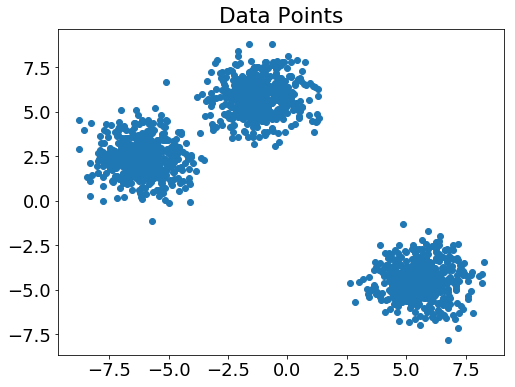

In [4]:
plt.figure(figsize=(8, 6));
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.scatter(x[:,0],x[:,1], cmap=plt.get_cmap('Pastel1'));
plt.title("Data Points");

First, we generate the dendrogram using single linkage. The matrix z contains one raw for every merge operation.

In [17]:
z = linkage(x, 'single')
print('z has %d rows'%(z.shape[0]))

z has 1499 rows


In [15]:
print('The first merge was done between %d and %d based on a distance of %.5f '%(z[0][0],z[0][1],z[0][2]))

The first merge was done between 1247 and 1466 based on a distance of 0.00100 


Now let's plot the full dendrogram.

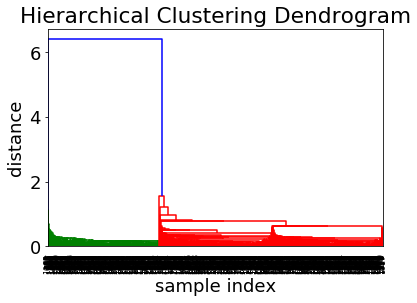

In [18]:
#plt.figure(figsize=(25, 10))
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(z, 
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

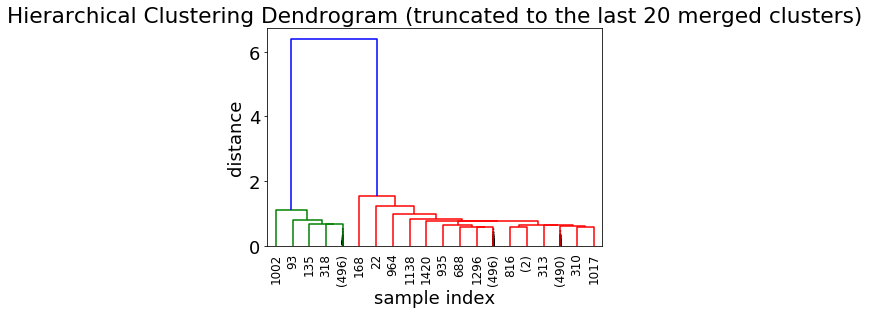

In [24]:
plt.title('Hierarchical Clustering Dendrogram (truncated to the last 20 merged clusters)')
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    #show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

## Knee/Elbow Analysis
To decide the number of cluster, let's plot the WSS and BSS curves and perform a knee/elbow analysis. For every k, we compute the clustering from the dendrogram z and compute WSS and BSS.

In [35]:
wss_values = []
bss_values = []
k_values = range(1,20)

for k in k_values:
    clustering = fcluster(z, k, criterion='maxclust')
    
    centroids = [np.mean(x[clustering==c],axis=0) for c in range(1,k+1)]
    
    cdist(x, centroids, 'euclidean') 
    
    D = cdist(x, centroids, 'euclidean')
    
    cIdx = np.argmin(D,axis=1)
    print(cIdx)
    d = np.min(D,axis=1)
    print(d)

    avgWithinSS = sum(d)/x.shape[0]

    # Total with-in sum of square
    wss = sum(d**2)
    print(pdist(x))
    tss = sum(pdist(x)**2)/x.shape[0]
    
    bss = tss-wss
    
    wss_values += [wss]
    bss_values += [bss]

[0 0 0 ... 0 0 0]
[5.1243  3.09541 8.67129 ... 4.55024 3.68541 4.98654]
[ 4.7644  12.58737 12.7183  ...  5.44974  1.2171   6.49512]
[1 1 0 ... 1 1 1]
[4.13316 1.43236 0.30315 ... 1.41268 4.21903 2.62273]
[ 4.7644  12.58737 12.7183  ...  5.44974  1.2171   6.49512]
[1 1 0 ... 1 1 1]
[4.13158 1.43045 0.30315 ... 1.41199 4.21801 2.62184]
[ 4.7644  12.58737 12.7183  ...  5.44974  1.2171   6.49512]
[2 1 0 ... 1 1 1]
[1.59529 1.42945 0.30315 ... 1.41704 4.21518 2.62705]
[ 4.7644  12.58737 12.7183  ...  5.44974  1.2171   6.49512]
[3 2 0 ... 2 2 2]
[1.59529 1.42945 0.30148 ... 1.41704 4.21518 2.62705]
[ 4.7644  12.58737 12.7183  ...  5.44974  1.2171   6.49512]
[4 2 0 ... 2 3 2]
[1.59529 1.43155 0.30148 ... 1.41158 4.21264 2.62151]
[ 4.7644  12.58737 12.7183  ...  5.44974  1.2171   6.49512]
[5 2 0 ... 2 4 2]
[1.59529 1.42676 0.30148 ... 1.41614 4.21264 2.62588]
[ 4.7644  12.58737 12.7183  ...  5.44974  1.2171   6.49512]
[6 3 0 ... 3 5 3]
[1.59529 1.42676 0.30399 ... 1.41614 4.21264 2.62588]
[ 4.

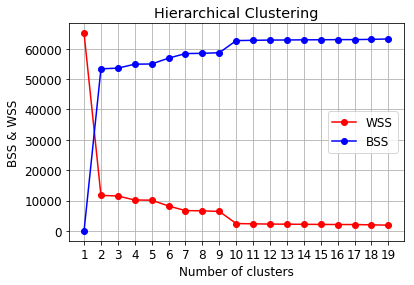

In [14]:
fig = plt.figure()
font = {'family' : 'sans', 'size'   : 12}
plt.rc('font', **font)
plt.plot(k_values, wss_values, 'bo-', color='red', label='WSS')
plt.plot(k_values, bss_values, 'bo-', color='blue', label='BSS')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('BSS & WSS')
plt.xticks(k_values)
plt.legend()
plt.title('Hierarchical Clustering');

From the chart we note that there is a big drop for k=2 and then WSS and BSS smoothly decrease/increase until k=10. So we might decide to either choose k=2 or k=10. To better understand what happened, let's check the clusterings for all the values of k from 2 to 10.

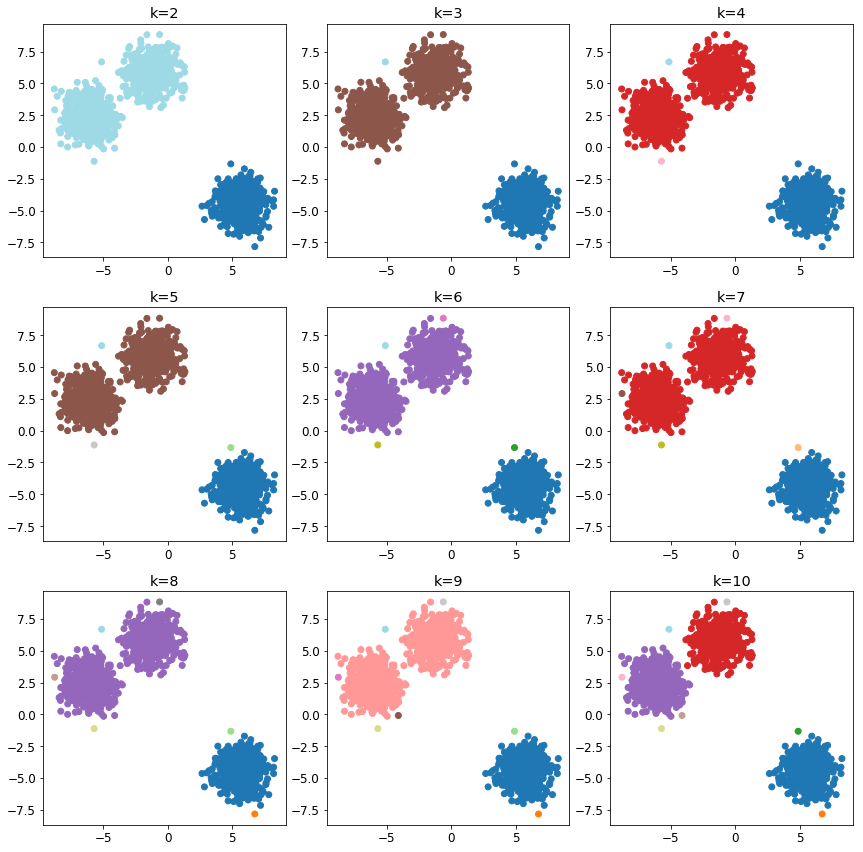

In [10]:
plt.figure(figsize=(12, 12));

for k in range(2,11):
    yp = fcluster(z, k, criterion='maxclust')

    plt.subplot(330+(k-1))
    plt.title('k='+str(k))
    plt.scatter(x[:, 0], x[:, 1], c=yp,cmap=plt.get_cmap('Vega20'))
    
plt.tight_layout()

Note that, when k=2 the algorithm has separated the two nearby cluster from the very distant one. The next merge operations regard points around the main clusters that are typically nearby existing clusters and thus don't generate significant changes of BSS and WSS until k=10 when the three big clusters and a pletora of one point clusters are found. 

### Exercise
Repeat the experiment with another type of linkage (e.g., complete, average or ward) and analyze what changes.